# __Data Processing__

Different from original paper, in our reproduction attemp we will use data collected before the Brazilian presidential ellection in 2022.

The two terms used as search query to extract tweets were:

    1. #BolsonaroReeleito
    2. O LULA TÁ ELEITO
    
Both terms extracted in the same date, November 22nd, 2022.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
data_path = '../data/tweets/'

bols_df = pd.read_csv(data_path+'2022-11-22-#BolsonaroReeleito.csv')
lula_df = pd.read_csv(data_path+'2022-11-22-O LULA TÁ ELEITO.csv')

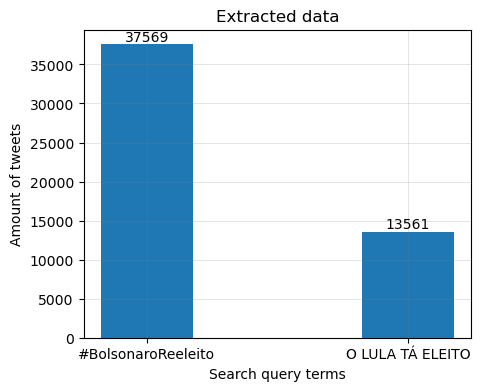

In [3]:
fig, ax = plt.subplots(figsize=(5,4))
ax.grid(True,
        color='grey',
        linestyle='-',
        linewidth=0.5,
        alpha=0.3,)
plt.bar(
    ['#BolsonaroReeleito', 'O LULA TÁ ELEITO'],
    [bols_df.shape[0], lula_df.shape[0]],
    width=0.35)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Search query terms')
plt.ylabel('Amount of tweets')
plt.title('Extracted data')
plt.show()

In [4]:
bols_df.drop('Unnamed: 0', axis=1, inplace=True)
lula_df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
bols_df.sample(5)

,created_at,tweet_id,tweet_content,user,user_info,has_mention,mentions,is_reply,reply_to,is_quote,quoted_from,is_retweet,retweeted_from,hashtags
4878,2022-11-23 01:37:23,1595229996125233154,#BolsonaroReeleito\nLULA NA CADEIA https://t.c...,RibeiroCelsinho,"{'id': 1510395710134538252, 'name': 'Celsinho ...",False,NaN,False,NaN,False,NaN,True,"{'user': 'cpavanini', 'user_id': 1315693973097...",['#BolsonaroReeleito']
3687,2022-11-23 01:53:04,1595233940289343491,#BolsonaroReeleito\nDEUS NO COMANDO DE TUDO ht...,AnderTorres5,"{'id': 730913142021234688, 'name': 'Ander Torr...",False,NaN,False,NaN,False,NaN,True,"{'user': 'gabrielpaulo221', 'user_id': 1206995...",['#BolsonaroReeleito']
36404,2022-11-22 20:58:30,1595159810248675329,Bolsonaro 51% está Reeleito.\n#BolsonaroReelei...,diego_berri3,"{'id': 1587047308738322433, 'name': 'Diego Ber...",False,NaN,False,NaN,False,NaN,True,"{'user': 'Suzano_info', 'user_id': 15057842073...",['#BolsonaroReeleito']
12076,2022-11-23 00:14:12,1595209063583088640,#BolsonaroReeleito\nEis o que realmente import...,Mauriciooo1999,"{'id': 1321654608066957320, 'name': 'Mauricio ...",False,NaN,False,NaN,False,NaN,True,"{'user': 'UdaJuris2022', 'user_id': 1531739142...",['#BolsonaroReeleito']
32563,2022-11-22 21:37:14,1595169560331751436,Sigam @E_PaKabah ! SDV todos!\n\nEsse dia cheg...,Marcelo08444139,"{'id': 1493167294108905477, 'name': 'Marcelo L...",True,"[{'id': '419803861', 'username': 'E_PaKabah'}]",False,NaN,False,NaN,True,"{'user': 'E_PaKabah', 'user_id': 419803861, 't...",['#BolsonaroReeleito']


In [6]:
lula_df.sample(5)

,created_at,tweet_id,tweet_content,user,user_info,has_mention,mentions,is_reply,reply_to,is_quote,quoted_from,is_retweet,retweeted_from,hashtags
7558,2022-11-22 23:07:04,1595192166548209665,Eu ouvi BOLSONARO 51 IMÓVEIS?\nLula ta Eleito ...,_Moojii_,"{'id': 188758902, 'name': '🇦🇹 Moojii✌🏽❤', 'des...",False,NaN,False,NaN,False,NaN,True,"{'user': 'Rossano_v_', 'user_id': 91990364, 't...",NaN
9349,2022-11-22 22:33:47,1595183790233915392,"Pacheco diz que vitória de Lula é ""inquestioná...",Cezar33601670,"{'id': 1556452941665603587, 'name': 'Esquerda ...",False,NaN,False,NaN,False,NaN,True,"{'user': '_Janoninho', 'user_id': 156389790744...",NaN
5560,2022-11-22 23:48:29,1595202590333177857,BOLSONARO NA CADEIA\nBOLSONARO 51 IMOVEIS\nBOL...,carlosrafer,"{'id': 474122288, 'name': 'ESTOU COM LULA, PRE...",False,NaN,False,NaN,False,NaN,True,"{'user': 'MarcianoBrito13', 'user_id': 2960449...",NaN
9773,2022-11-22 22:26:46,1595182023093747714,"Chora mais, BOLSONARO 51 IMÓVEIS. \nO LULA TÁ ...",SeuPobreFudido,"{'id': 1403142975488724993, 'name': 'João Gabr...",False,NaN,False,NaN,False,NaN,True,"{'user': '_Janoninho', 'user_id': 156389790744...",NaN
2310,2022-11-23 01:12:19,1595223685106962432,BOLSONARO NA CADEIA \n\nO LULA TÁ ELEITO\n\nXA...,c5498977,"{'id': 1586787500810444802, 'name': 'Carmem', ...",False,NaN,False,NaN,True,"{'user': '1RosaVermelha', 'user_id': 148397920...",False,NaN,NaN


### Data Filtering

The original work uses only native tweets and retweets. Our data contains quoted tweets, that we will exclude.

In [7]:
old_amount = (bols_df.shape[0], lula_df.shape[0])

bols_df = bols_df[bols_df['is_quote']==False]
lula_df = lula_df[lula_df['is_quote']==False]

plot_df = pd.DataFrame(data={'old_amount': [old_amount[0], old_amount[1]],
                             'current_amount': [bols_df.shape[0], lula_df.shape[0]]},
                       index=['#BolsonaroReeleito', 'O LULA TÁ ELEITO'])

In [8]:
plot_df

,old_amount,current_amount
#BolsonaroReeleito,37569,36870
O LULA TÁ ELEITO,13561,12871


In order to decrease the data sparsity, we consider only users with at least 5 retweets or 3 composed tweets, and tweets with the minimum number of 5 retweets.

In [9]:
# retweets
bolso_rts = bols_df.query('is_retweet == True')
lula_rts = lula_df.query('is_retweet == True')

bolso_comp = bols_df.query('is_retweet == False')
lula_comp = lula_df.query('is_retweet == False')

print(f'''
Bolsonaro data:
Retweets: {bolso_rts.shape[0]}
Composed tweets: {bolso_comp.shape[0]}

Lula data:
Retweets: {lula_rts.shape[0]}
Composed tweets: {lula_comp.shape[0]}
''')


Bolsonaro data:
Retweets: 32253
Composed tweets: 4617

Lula data:
Retweets: 9180
Composed tweets: 3691



In [23]:
# users with 3 o more composed tweets
users_comp = {}

users_comp['bolso_data'] = [user for user,tweets_amount in list(zip(bolso_comp['user'].value_counts().index, bolso_comp['user'].value_counts())) if tweets_amount >= 3]
users_comp['lula_data'] = [user for user,tweets_amount in list(zip(lula_comp['user'].value_counts().index, lula_comp['user'].value_counts())) if tweets_amount >= 3]

print(f'''
Number of users with 3 or more composed tweets
Bolsonaro data: {len(users_comp['bolso_data'])}
Lula data: {len(users_comp['lula_data'])}
''')


Number of users with 3 or more composed tweets
Bolsonaro data: 278
Lula data: 163



In [24]:
# users with 5 or more retweets

users_rts = {}

users_rts['bolso_data'] = [user for user,rts_amount in list(zip(bolso_rts['user'].value_counts().index, bolso_rts['user'].value_counts())) if rts_amount >= 5]
users_rts['lula_data'] = [user for user,rts_amount in list(zip(lula_rts['user'].value_counts().index, lula_rts['user'].value_counts())) if rts_amount >= 5]

print(f'''
Number of users with 5 or more composed retweets
Bolsonaro data: {len(users_rts['bolso_data'])}
Lula data: {len(users_rts['lula_data'])}
''')


Number of users with 5 or more composed retweets
Bolsonaro data: 1012
Lula data: 331



In [32]:
# not excluded users

not_excluded = {}

not_excluded['bolso_data'] = list(set(users_comp['bolso_data']+users_rts['bolso_data']))
not_excluded['lula_data'] = list(set(users_comp['lula_data']+users_rts['lula_data']))

print(f'''
Not excluded users
Bolsonaro data: {len(not_excluded['bolso_data'])}
Lula data: {len(not_excluded['lula_data'])}
''')


Not excluded users
Bolsonaro data: 1257
Lula data: 462



In [ ]:
# Filtering

# bolsonaro's data


# lula's data

In [ ]:
users = [user for user, tt_amount in zip(bols_df['user'].value_counts().index, bols_df['user'].value_counts()) if ]

In [ ]:
zip(bols_df['user'].value_counts().index,bols_df['user'].value_counts())

### Merging Datasets

In [ ]:
complete_df = pd.concat([bols_df, lula_df])
complete_df.shape

In [ ]:
complete_df.drop_duplicates(inplace=True)
complete_df.shape